## Discrete Fourier Transform

If we discretize the independent variable, $t \rightarrow t_a \equiv a\,h$ where $a=0...N-1$ and $h=T/N$, then the function $f(t)$ is discretized as
$$
    f_a = f(t_a)
$$
which is easy to perform in Python,

    h = T / N                   # step size
    t = np.arange( N ) * h      # discretized time, t -> t[a]
    f = f( t )                  # discretized function, f(t) -> f[a]

then the discrete Fourier transform of the discretized function is
\begin{align}
    F_b 
    &= 
    \mathcal{F}[f_a] 
    \equiv 
    \sum_{a=0}^{N-1} f_a \cdot e^{-2 i \pi a b / N}
    \\
    &=
    \sum_a f(t_a) \cdot e^{-2\pi i\, b t_a/T},
\end{align}
and the  inverse transform is 
\begin{align}
    f_a 
    &= 
    \mathcal{F}^{-1}[Y_b] 
    \equiv 
    \frac{1}{N}\sum_{b=0}^{N-1} F_b\cdot e^{+i 2 \pi ab / N}.
\end{align}

In [2]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [18,18]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from IPython.display import display, Markdown, Latex, Math, Pretty

a) Write Python functions, `dft()` and `idft()`, to calculate the discrete Fourier transforms and the inverse discrete Fourier transform of a set of data.

Write your functions using two loops (one over `a` and the other over `b`) at first and then try to vectorize your code to eliminate one or both of the loops.

Test your functions by plotting the audio data in `pitch.txt` along with its Fourier transform.

Check that your functions return the same results as `numpy.fft.fft()` and `numpy.fft.ifft()`.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


The maximum difference between dft() and fft() is:  1.2914936599381943e-10


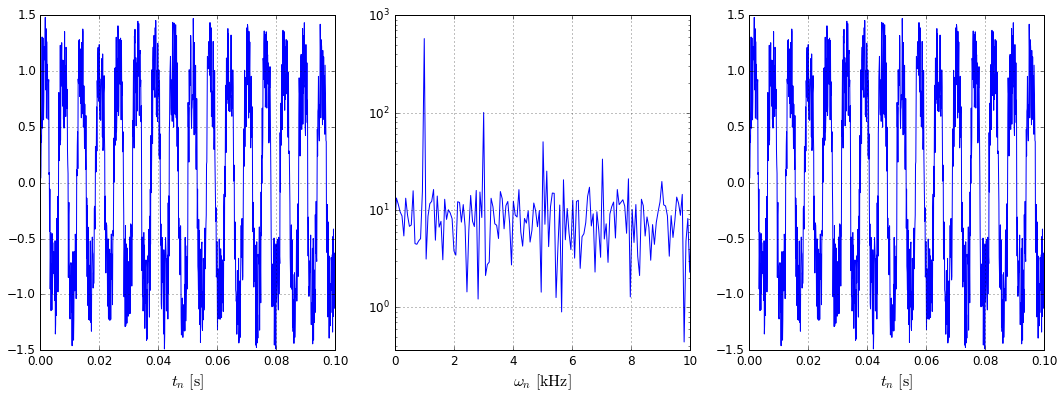

In [3]:
%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [18,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#################### load sample data file
f = np.loadtxt( "pitch.txt", float )

#################### constants
N = len( f )
T_max = 0.1        # seconds
#################### calculated constants
dt = T_max / N
t = np.arange( N ) * dt
w1 = 2 * pi / T_max    # the first frequency

#################### plot the data
fig = plt.figure()
ax1 = fig.add_subplot( 1, 3, 1 )
ax1.plot( t, f )
ax1.set_xlabel( r'$t_n \rm{\ [s]}$' )

#################### discrete Fourier transform and its inverse

'''
def dft(y):
    F = []
    for b in range(N):
        Fb = 0
        for a in range(N):
            Fb += y[a]*np.exp(-2*np.pi*1j*b*t[a]/T_max)
        F.append(Fb)
    return F
'''
def dft(y):
    f = np.array(y)
    F = np.zeros(N,dtype=complex)
    a = np.arange(N)
    b = np.arange(N)
    for i in b:
        F[i] += np.sum(f*np.exp(-2*np.pi*1j*b[i]*t/T_max))
    return F
                   
'''
def idft(Y):
    f = []
    for a in range(N):
        fa = 0
        for b in range(N):
            fa += Y[b]*np.exp(2*np.pi*1j*a*b/N)
        f.append(fa/N)
    return f
'''
def idft(Y):
    f = np.zeros(N)
    a = np.arange(N)
    b = np.arange(N)
    #print (len(a))
    #print (len(b))
    for i in a:
            f[i] += np.sum(Y*np.exp(2*np.pi*1j*a[i]*b/N))
    return f/N

#################### calculate the dft
F = dft(f)
fn = idft(F)
#################### plot the dft
ax2 = fig.add_subplot( 1, 3, 2 )
ax2.semilogy( np.arange(N)*w1/1000, np.abs(F) )
ax2.set_xlabel( r'$\omega_n\rm{\ [kHz]}$' )
ax2.axis( [0,10,0,1000] )
#################### plot the idft
ax3 = fig.add_subplot( 1, 3, 3 )
ax3.plot( t, fn )
ax3.set_xlabel( r'$t_n \rm{\ [s]}$' )

# This is the maximum difference between fft(y) and 
# dft(y), which should be zero.
print( 'The maximum difference between dft() and fft() is: ', 
      np.abs(np.max( dft(f) - fft( f ) ) ))

## Low Pass Filters

It is straightforward to implement a low-pass filter -- all we have to do is to eliminate the higher frequencies. This is easy to do in Python using array slicing:

    n = 10      # only include the first n frequencies 
    Y[n:N] = 0  # use array slicing to eliminate the higher frequencies
    
b) Create a low-pass filter by eliminating all but the lowest 32 components of $F_b$ and then performing an inverse discrete Fourier transform on the result. 

Plot the audio data in `pitch.txt` along with the filtered result. 

[ 6.6603016  +0.        j  5.04602896-12.28106025j
 -9.86459267 +5.80734103j ...  8.04598719 +5.18535619j
 -9.86459267 -5.80734103j  5.04602896+12.28106025j]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:70: ComplexWarning: Casting complex values to real discards the imaginary part


1024
1024
1024


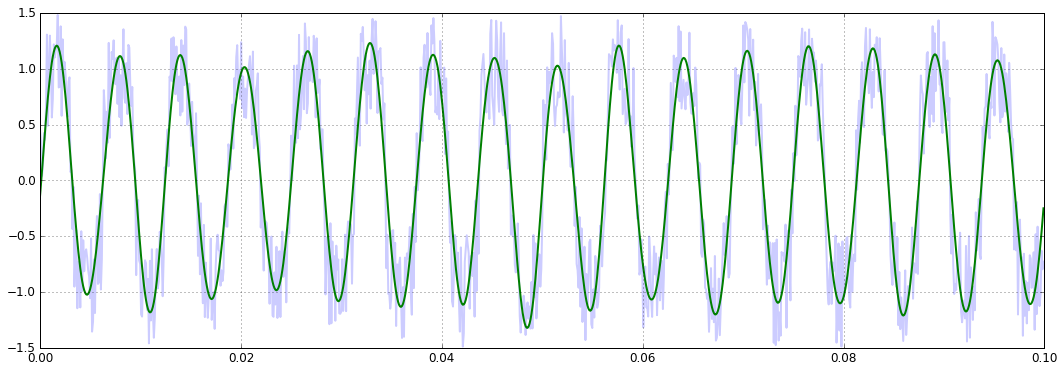

In [4]:
n = 32
F[n:N-n] = 0.0
print (F)
y = idft(F)

print (len(y))
print (len(f))
print (len(t))

plt.plot( t, f, lw=2, alpha=0.2 )
plt.plot( t, y, lw=2 )



c) Plot a single cycle of a square-wave along with the first ten terms in its Fourier series.

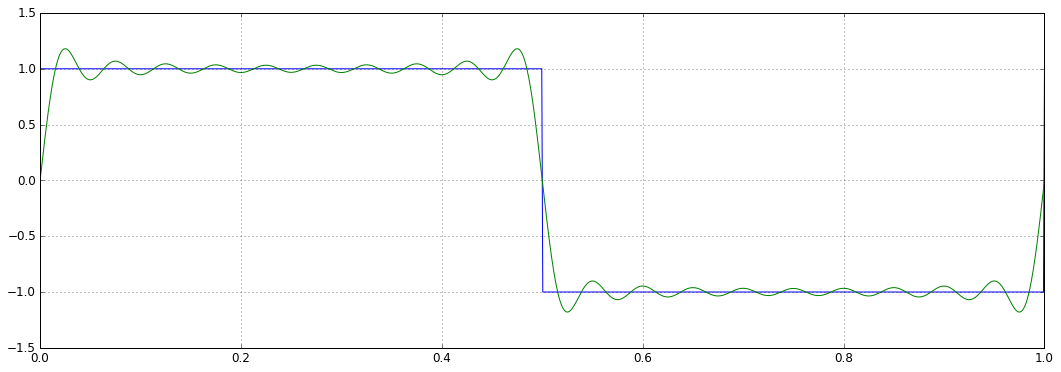

In [5]:
from scipy import signal

plt.figure()

N = 1000
t = np.linspace(0, 1, N)
plt.plot(t, signal.square(2 * np.pi * t))


def Fsqu(n,t,N):
    f = np.zeros( N )
    for i in range( n ) :
        n = 2*i+1
        bn = 4 / pi / n
        f += bn * np.sin(n*2*np.pi*t)
    return f
    
plt.plot(t, Fsqu(10,t,N))



d) Plot a single cycle of a sawtooth wave, $y_n=n$, along with the first ten terms in its Fourier series

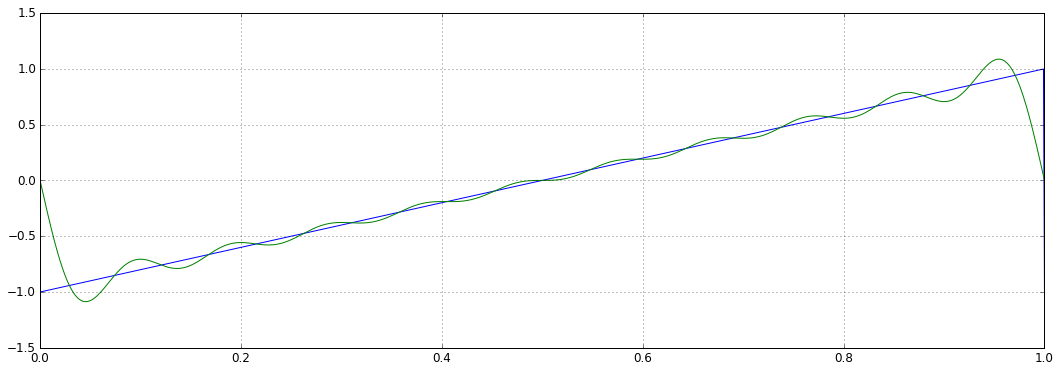

In [8]:
N = 1000
t = np.linspace(0, 1, N)
plt.plot(t, signal.sawtooth(2 * np.pi * t))

def Fsaw(n,t,N):
    f = np.zeros( N )
    for i in range( 1,n+1 ) :
        f += (1/i)*np.sin(i*2*np.pi*t)
    return -2*(1/np.pi)*f

plt.plot(t,Fsaw(10,t,N))
        


e) Plot $\log|Y|$, the logarithm of the absolute value of the discrete Fourier transform of the modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$. Use `np.log10()`.